In [1]:
# 导入相关库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 中文字体设置
plt.rcParams['font.family']='Microsoft YaHei' 
plt.rcParams['axes.unicode_minus'] = False 

In [2]:
train = pd.read_csv(r'Seaborn/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.dtypes

#train.info()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

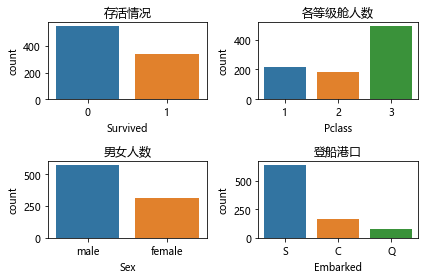

In [6]:
# 查看各个特征对应的人数分布，即画出存活人数情况、各等级舱人数、男女人数和登船港口人数的条形图。画在一个2*2的图像里
# 各属性对应的人数分布
plt.subplot(2,2,1)
sns.countplot(x='Survived', data=train)
plt.title('存活情况')

plt.subplot(2,2,2)
sns.countplot(x='Pclass', data=train)
plt.title('各等级舱人数')

plt.subplot(2,2,3)
sns.countplot(x='Sex', data=train)
plt.title('男女人数')

plt.subplot(2,2,4)
sns.countplot(x='Embarked', data=train)
plt.title('登船港口')
plt.tight_layout()
#tight_layout会自动调整子图参数，使之填充整个图像区域。这是个实验特性，可能在一些情况下不工作。它仅仅检查坐标轴标签、刻度标签以及标题的部分。

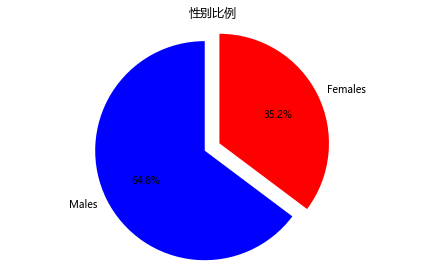

In [7]:
#画一个饼图显示男女人数比例
males = (train['Sex'] == 'male').sum()
females = (train['Sex'] == 'female').sum()
proportions = [males, females]

# 绘制饼图
plt.pie(proportions, labels = ['Males', 'Females'], shadow = False, colors = ['blue','red'], explode = (0.15 , 0), startangle = 90, autopct = '%1.1f%%')
plt.axis('equal')
plt.title("性别比例")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, '各船舱的等级的存活情况')

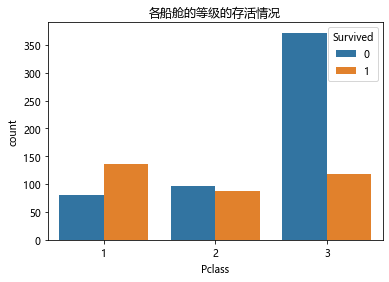

In [8]:
# 用柱状图展示各等级船舱的存活死亡人数
sns.countplot(x='Pclass',hue='Survived',data=train)
plt.title('各船舱的等级的存活情况')

In [11]:
# 各等级船舱按age展示存活情况，用seaborn画条形图 幸存率与Age的关系

Age_survived_rate=(train.groupby(['Age']).sum()/train.groupby(['Age']).count())['Survived']
# age_survived_rate.plot()
sns.pointplot(x='Age_level', y='Age_survived_rate', hue='Sex', data=train)

ValueError: Could not interpret input 'Age_level'